In [1]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [3]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("titles.csv")

In [4]:
df.head(len(df))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"['romance', 'music']",['PR'],NaN,NaN,NaN,NaN,8.425,8.1
3290,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,['comedy'],['PA'],NaN,tt9257620,5.9,50.0,1.400,2.0
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN
3292,tm1121486,Entre Nos: The Winners 2,MOVIE,Comedy special starring winners of the second ...,2021,NaN,28,['comedy'],[],NaN,tt15532736,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3294 non-null   object 
 1   title                 3294 non-null   object 
 2   type                  3294 non-null   object 
 3   description           3282 non-null   object 
 4   release_year          3294 non-null   int64  
 5   age_certification     2086 non-null   object 
 6   runtime               3294 non-null   int64  
 7   genres                3294 non-null   object 
 8   production_countries  3294 non-null   object 
 9   seasons               756 non-null    float64
 10  imdb_id               2968 non-null   object 
 11  imdb_score            2922 non-null   float64
 12  imdb_votes            2911 non-null   float64
 13  tmdb_popularity       3261 non-null   float64
 14  tmdb_score            3026 non-null   float64
dtypes: float64(5), int64(

In [6]:
# Dealing with missing data
df.isnull().any()

id                      False
title                   False
type                    False
description              True
release_year            False
age_certification        True
runtime                 False
genres                  False
production_countries    False
seasons                  True
imdb_id                  True
imdb_score               True
imdb_votes               True
tmdb_popularity          True
tmdb_score               True
dtype: bool

In [15]:
# Create a new df of just the rows that are missing data
df_null_geo = df[pd.isnull(df.tmdb_score)]
df_null_geo.head(len(df))

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
108,tm87794,"The 47 Ronin, Part 1",MOVIE,The first part of Kenji Mizoguchi's two-part e...,1941,NaN,112,"['action', 'drama', 'history']",['JP'],NaN,NaN,NaN,NaN,0.600,NaN
155,tm79163,"The 47 Ronin, Part 2",MOVIE,The second part of Kenji Mizoguchi's two-part ...,1942,NaN,111,"['action', 'drama', 'history']",[],NaN,NaN,NaN,NaN,NaN,NaN
696,tm657921,"Alexander and the Terrible, Horrible, No Good,...",MOVIE,What a day Alexander is having. He's got gum s...,1990,NaN,30,"['animation', 'family']",['US'],NaN,tt1394153,6.8,59.0,0.600,NaN
702,tm749734,"Lyle, Lyle Crocodile: The Musical - The House ...",MOVIE,The Primm family moves into an old brownstone ...,1987,NaN,25,"['animation', 'family']",['US'],NaN,tt0239572,8.1,61.0,0.600,NaN
705,tm753096,Earthday Birthday,MOVIE,After learning about pollution a group of crea...,1990,NaN,30,['animation'],['US'],NaN,tt0241396,6.3,29.0,0.840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,tm1128651,Farruko Live On Max,MOVIE,NaN,2021,NaN,75,['music'],[],NaN,NaN,NaN,NaN,0.725,NaN
3287,ts272570,Double Cross with Blake Griffin,SHOW,Double Cross with Blake Griffin serves up an i...,2021,NaN,24,['reality'],['US'],1.0,tt14055674,5.0,48.0,0.600,NaN
3288,tm927169,Sër Bi,MOVIE,A young woman preparing for her marriage despe...,2021,NaN,21,['drama'],"['FR', 'SN']",NaN,NaN,NaN,NaN,0.600,NaN
3291,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,['comedy'],[],NaN,tt15532762,NaN,NaN,NaN,NaN


In [ ]:
# description has 12 missing values
# age_certification has 1208 missing values
# seasons has 2538 missing values
# imdb_id has 326 missing values
# imdb_score has 372 missing values
# imdb_votes has 383 missing values
# tmdb_popularity has 33 missing values
# tmdb_score has 268 missing values

In [ ]:
# Release year

Text(0, 0.5, '')

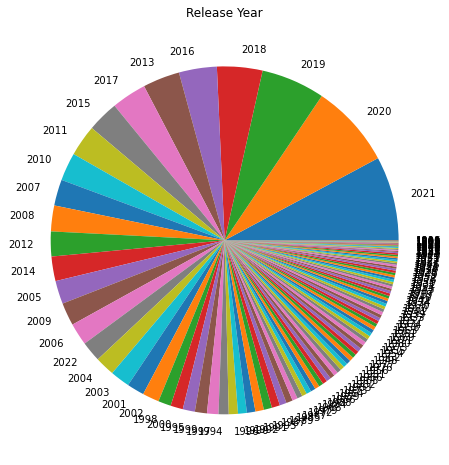

In [17]:
plt.figure(figsize=(12,8));

services = df['release_year'].value_counts()
services.plot(kind='pie')

plt.title('Release Year')
plt.ylabel("")

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

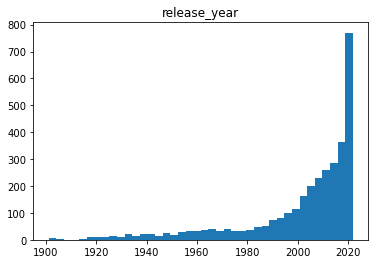

In [18]:
df.hist(['release_year'], bins=40, grid=False)